# Transformando o dataframe

1. Leia o arquivo **datasets/airquality.csv** e armaze seu contéudo no data **qualities**.

In [1]:
import pandas as pd


In [2]:
arquivo = 'datasets/airquality.csv'
qualities = pd.read_csv(arquivo)

2. Mostre as linhas iniciais do dataframe **qualities**.

In [3]:
qualities.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


3. Transforme as variáveis **Ozone**, **Solar.R**, **Wind**, **Temp** que estão em colunas para linhas utilizando o método **melt** do **pandas**. Armazene o dataframe transformado no dataframe **qualities_melted**.

In [4]:
qualities_melted = pd.melt(frame=qualities
                           , id_vars=['Month', 'Day'])
qualities_melted.head()

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


4. Repita a transformação anterior, modificando o nome da coluna **variable** para **medida**, e o nome da coluna **value** para **leitura**.

In [5]:
qualities_melted = pd.melt(frame=qualities, 
                           id_vars=['Month', 'Day'],
                           var_name='medida',
                           value_name='leitura')
qualities_melted.head()

,Month,Day,medida,leitura
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


5. Faça o download do arquivo (**https://cdncontribute.geeksforgeeks.org/wp-content/uploads/nba.csv**) que contém dos jogadores da NBA. Armazene o seu conteúdo no arquivo **datasets/nba.csv**

In [20]:
from urllib.request import urlretrieve
url = 'https://cdncontribute.geeksforgeeks.org/wp-content/uploads/nba.csv'
urlretrieve(url, 'datasets/nba.csv')

('datasets/nba.csv', <http.client.HTTPMessage at 0x116f30c50>)

6. Verifique a estrutura do arquivo **datasets/nba_data.csv** com os comandos **head** and **tail** do Linux.

In [22]:
arquivo = 'datasets/nba.csv'
!head -n 5 $arquivo

Name,Team,Number,Position,Age,Height,Weight,College,Salary
Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,
R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0


In [23]:
!tail -n 5 $arquivo

Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,,900000.0
Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,,2900000.0
Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
,,,,,,,,


7. Importe o arquivo **datasets/nba.csv** para o dataframe **nbas**. Utilize o parâmetro **skipfooter=1** para o comando **read_csv** ignorar a última linha do arquivo.

In [24]:
nbas = pd.read_csv(arquivo, skipfooter=1)
nbas.tail()

/Users/luiz/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


8. Plote um histograma das idades (**Age**) dos jogadores no dataframe **nbas**.

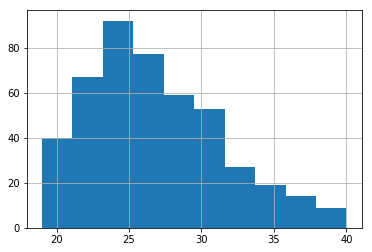

In [25]:
nbas['Age'].hist()

9. Transforme as variáveis **Height** e **Weight** que estão em colunas para linhas utilizando o método **melt** do **pandas**. Armazene o dataframe transformado no dataframe **nbas_melted**. O nome da coluna **variable** deverá ser **medida** e da coluna value deverá ser **leitura**.

In [26]:
nbas_melted = pd.melt(frame=nbas, 
         id_vars=['Name', 'Team', 'Position', 'Age', 'College', 'Salary'],
         value_vars=['Height', 'Weight'],
         var_name='medida',
         value_name='leitura')
nbas_melted.head()

,Name,Team,Position,Age,College,Salary,medida,leitura
0,Avery Bradley,Boston Celtics,PG,25.0,Texas,7730337.0,Height,6-2
1,Jae Crowder,Boston Celtics,SF,25.0,Marquette,6796117.0,Height,6-6
2,John Holland,Boston Celtics,SG,27.0,Boston University,NaN,Height,6-5
3,R.J. Hunter,Boston Celtics,SG,22.0,Georgia State,1148640.0,Height,6-5
4,Jonas Jerebko,Boston Celtics,PF,29.0,NaN,5000000.0,Height,6-10


10. Realize a "pivotagem" do dataframe **qualities_melted** criado anteriormente. As variáveis indexadores deverão ser **Month** e **Day**. Armazene o conteúdo do dataframe **pivotado** no dataframe **qualities_pivoted**. Mostre as linhas iniciais do dataframe.

In [13]:
qualities_pivoted = qualities_melted.pivot_table(
    index=['Month', 'Day']
    , columns='medida'
    , values='leitura')
qualities_pivoted.head()

medida      Solar.R  Ozone  Temp  Wind
Month Day                             
5     1       190.0   41.0  67.0   7.4
      2       118.0   36.0  72.0   8.0
      3       149.0   12.0  74.0  12.6
      4       313.0   18.0  62.0  11.5
      5         NaN    NaN  56.0  14.3
      6         NaN   28.0  66.0  14.9
      7       299.0   23.0  65.0   8.6
      8        99.0   19.0  59.0  13.8
      9        19.0    8.0  61.0  20.1
      10      194.0    NaN  69.0   8.6

11. Reset index do dataframe **qualities_pivoted** e armazene no dataframe **qualities_pivoted_reseted**. Mostre as linhas iniciais do dataframe **qualities_pivoted_reseted**.

In [14]:
qualities_pivoted_reseted = qualities_pivoted.reset_index()
qualities_pivoted_reseted.head()

medida,Month,Day,Solar.R,Ozone,Temp,Wind
0,5,1,190.0,41.0,67.0,7.4
1,5,2,118.0,36.0,72.0,8.0
2,5,3,149.0,12.0,74.0,12.6
3,5,4,313.0,18.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


12. Leia o arquivo **datasets/dados.csv** e armazene no dataframe **dados**. Mostre as primeiras linhas do dataframe **dados**.

In [15]:
arquivo = 'datasets/dados.csv'
dados   = pd.read_csv(arquivo)
dados.head()

,country,year,m014,m1524,m2534,f3544,f4554,f5564
0,AD,2000,0.0,0.0,1.0,NaN,NaN,NaN
1,AE,2000,2.0,4.0,4.0,3.0,0.0,0.0
2,AF,2000,52.0,228.0,183.0,339.0,205.0,99.0
3,AG,2000,0.0,0.0,0.0,0.0,0.0,0.0
4,AL,2000,2.0,19.0,21.0,8.0,8.0,5.0


13. Transforme as variáveis que iniciam com **m** e com **f** que estão em colunas para linhas utilizando o método **melt** do **pandas**. Nomeia a coluna **variable** para **gender_age_group** e a coluna **values** para **count**. Armazene o dataframe transformado no dataframe **dados_melted**.

In [16]:
dados_melted = pd.melt(frame=dados, id_vars=['country', 'year']
                       , var_name='gender_age_group'
                       , value_name='count')
dados_melted.head()

,country,year,gender_age_group,count
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0


14. Divida a coluna **gender_age_group** nas colunas **gender** e **age_group** do dataframe **dados_melted**.

In [17]:
dados_melted['gender']    = dados_melted.gender_age_group.str[0]
dados_melted['age_group'] = dados_melted.gender_age_group.str[1:]
dados_melted.head()


,country,year,gender_age_group,count,gender,age_group
0,AD,2000,m014,0.0,m,014
1,AE,2000,m014,2.0,m,014
2,AF,2000,m014,52.0,m,014
3,AG,2000,m014,0.0,m,014
4,AL,2000,m014,2.0,m,014


15. Remova a coluna **gender_age_group** do dataframe **dados_melted**.

In [61]:
dados_melted.drop('gender_age_group', axis=1, inplace=True)
dados_melted.head()

,country,year,count,gender,age_group
0,AD,2000,0.0,m,014
1,AE,2000,2.0,m,014
2,AF,2000,52.0,m,014
3,AG,2000,0.0,m,014
4,AL,2000,2.0,m,014
